In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df_mut = pd.read_table('TCGA.STAD.expression.txt', sep='\t')
df_meta = pd.read_table('TCGA.STAD.metadata.txt', sep='\t')
char_to_exclude = '?'
columns_to_exclude = [col for col in df_mut.columns if char_to_exclude in col]
df_mut = df_mut.drop(columns=columns_to_exclude)
print(df_mut)

       patient_id                     sample_id     A1BG|1  A1CF|29974  \
0    TCGA-CG-4460  TCGA-CG-4460-01A-01R-1157-13  93.052200   12.340600   
1    TCGA-CG-5716  TCGA-CG-5716-01A-21R-1802-13  84.107200   34.691300   
2    TCGA-HF-7131  TCGA-HF-7131-01A-11R-2055-13  12.191900  524.253000   
3    TCGA-3M-AB46  TCGA-3M-AB46-01A-11R-A414-31  38.520380    4.920650   
4    TCGA-3M-AB47  TCGA-3M-AB47-01A-22R-A414-31  45.368918   76.903904   
..            ...                           ...        ...         ...   
442  TCGA-CG-4469  TCGA-CG-4469-01A-01R-1157-13  14.710811         NaN   
443  TCGA-CG-4474  TCGA-CG-4474-01A-02R-1157-13  37.764156         NaN   
444  TCGA-CG-4475  TCGA-CG-4475-01A-01R-1157-13  16.769487         NaN   
445  TCGA-CG-4476  TCGA-CG-4476-01A-01R-1157-13  24.972112         NaN   
446  TCGA-CG-4477  TCGA-CG-4477-01A-01R-1157-13  24.412300         NaN   

     A2BP1|54715  A2LD1|87769         A2M|2  A2ML1|144568  A4GALT|53947  \
0      72.809500   108.239000  17955

In [38]:
df_num1 = df_mut.select_dtypes(exclude=['object'])
#df_num2 = df_mut.select_dtypes(exclude=['object'])
#df_e = df_num2.dropna(axis=1)
#df_num = df_merge.select_dtypes(exclude=['object'])
df_e = df_num1.dropna(axis=1)
log2df = df_e.apply(lambda x: np.log2(x + 2))
filtered_df = log2df[log2df.mean(skipna=True).nlargest(500).index]
df_e_norm = StandardScaler().fit_transform(filtered_df)
df_merge = pd.concat([df_meta, pd.DataFrame(df_e_norm, columns = filtered_df.columns)], axis=1)
df_cov = df_merge.select_dtypes(exclude=['object'])
cov_matrix = df_cov.cov()
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
                                     age_at_initial_pathologic_diagnosis  \
age_at_initial_pathologic_diagnosis                           115.497650   
OS                                                              0.373964   
OS.time                                                      -709.977559   
DSS                                                            -0.126588   
DSS.time                                                     -709.977559   
...                                                                  ...   
GLG1|2734                                                      -0.800182   
SFPQ|6421                                                      -0.142812   
SPARCL1|8404                                                    0.370651   
ADAM9|8754                                                      0.274864   
PAPOLA|10914                                                   -0.113043   

                                            OS        OS.time       

In [25]:
# Convert DataFrame to numpy array if needed
data_array = df_e.values
cov_matrix_np = np.cov(data_array, rowvar=False)
print("NumPy Covariance Matrix:")
print(cov_matrix_np)

NumPy Covariance Matrix:
[[ 2.35661761e-01  1.06384366e-01  1.38065457e+00 ...  3.50323420e+01
   8.79094701e-01  1.05482724e+00]
 [ 1.06384366e-01  2.14745037e-01  2.78378927e+00 ...  1.31829154e+01
  -8.01355605e+00 -1.61651757e-01]
 [ 1.38065457e+00  2.78378927e+00  3.79993456e+03 ... -9.68182391e+02
  -2.62914663e+03 -2.53140861e+03]
 ...
 [ 3.50323420e+01  1.31829154e+01 -9.68182391e+02 ...  5.74652173e+06
   4.91678553e+03 -9.76528950e+04]
 [ 8.79094701e-01 -8.01355605e+00 -2.62914663e+03 ...  4.91678553e+03
   6.31581766e+05  1.90073253e+04]
 [ 1.05482724e+00 -1.61651757e-01 -2.53140861e+03 ... -9.76528950e+04
   1.90073253e+04  5.46965081e+04]]


In [ ]:
plt.figure()
sns.heatmap(cov_matrix, annot=False, fmt='.2f', cmap='coolwarm', 
            xticklabels=df_cov.columns, yticklabels=df_cov.columns)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
corr_matrix = df_cov.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=df.columns, yticklabels=df.columns)
plt.title('Corr Matrix Heatmap')
plt.show()

In [5]:
corr2_matrix = df_meta.select_dtypes(exclude=['object']).corr()
print("\nCorrelation Matrix:")
print(corr2_matrix)


Correlation Matrix:
                                     age_at_initial_pathologic_diagnosis  \
age_at_initial_pathologic_diagnosis                             1.000000   
OS                                                              0.071247   
OS.time                                                        -0.125308   
DSS                                                            -0.027351   
DSS.time                                                       -0.125308   
DFI                                                            -0.049271   
DFI.time                                                       -0.176878   
PFI                                                            -0.104912   
PFI.time                                                       -0.100892   
Redaction                                                            NaN   

                                           OS   OS.time       DSS  DSS.time  \
age_at_initial_pathologic_diagnosis  0.071247 -0.125308 -0.0273

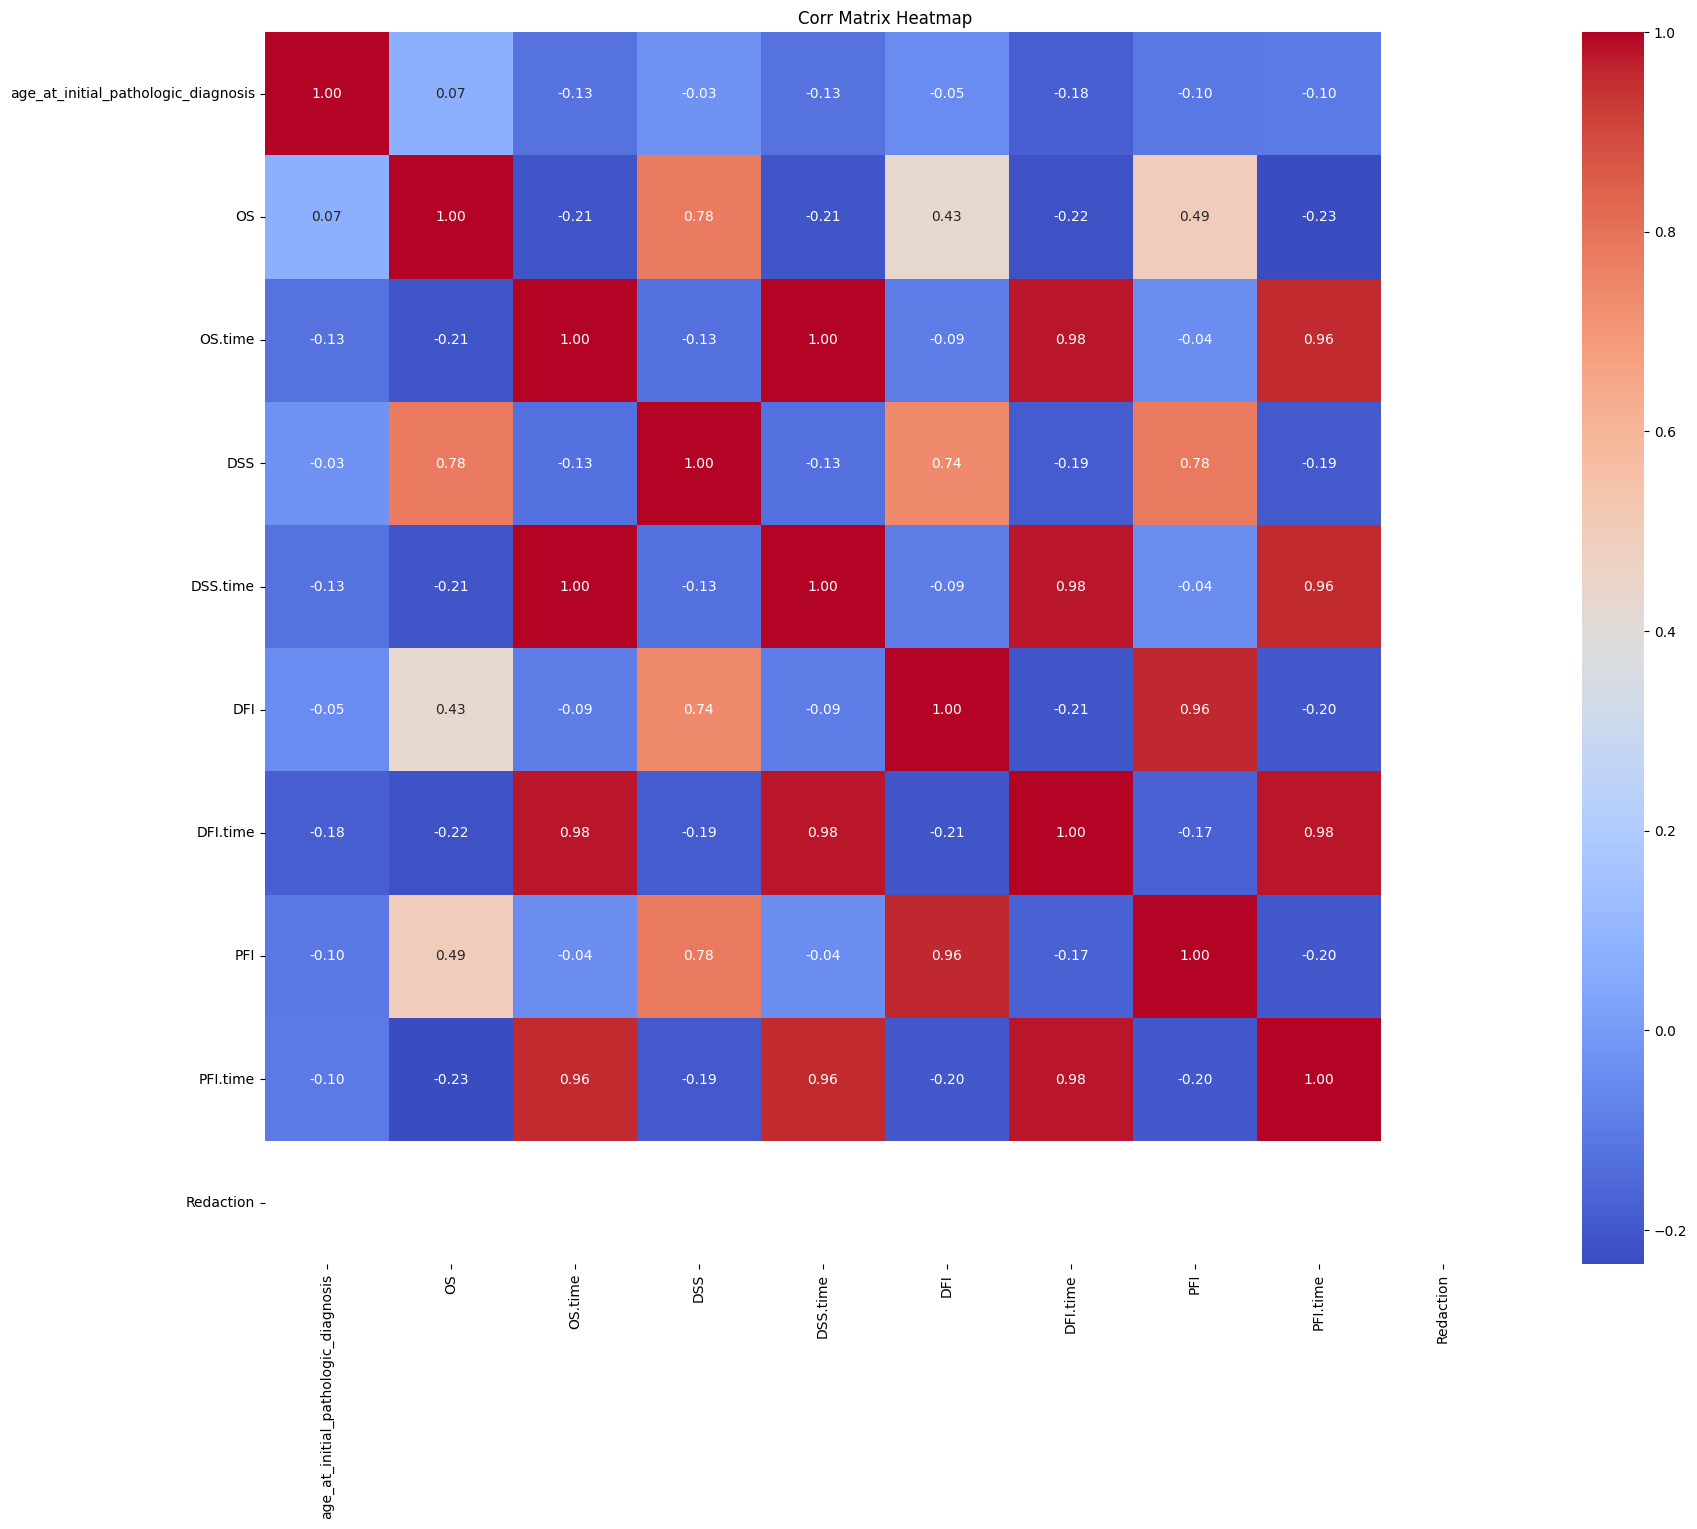

In [10]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr2_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=df_meta.select_dtypes(exclude=['object']).columns, yticklabels=df_meta.select_dtypes(exclude=['object']).columns)
plt.title('Corr Matrix Heatmap')
plt.show()